# KAGGLE: House Prices Explarotary Data Analysis

Takim olarak, Kaggle'daki meshur projelerden birisi olan 'House Prices' veri seti uzerinde Kesifci Veri Analizi (EDA) uygulayacagiz.

Bu proje, detaylı bir Keşifsel Veri Analizi (EDA) gerçekleştirerek başlayacak ve ardından veri ön işleme adımlarını tamamlayarak veri setimizi makine öğrenmesi modellemesi için hazırlayacak bir takım projesidir.

Projeyle ilgili daha detayli bilgi icin Kaggle sayfasina linkten ulasabilirsiniz. https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques

__Proje kapsaminda yapilacak bir takim gorevler:__

* Veri on inceleme
* Eksik verilerle basa cikilmasi
* Outlierlar ile basa cikilmasi
* Feature Engineering (Ozellik muhendisligi)
* Istatistiksel analizler ve veri gorsellestirme
* Encoding
* Standardizasyon ve Normalizasyon
* High - Low Cardinality tespit edilmesi
* Multicollinearity tespit edilmesi
* Logarithmic Donusum (Log Transormation)
* Github uzerinden takimca calisma becerileri

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('house_prices_reduced.csv')

In [4]:
df.head()

,Id,LotArea,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtQual,BsmtCond,...,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MoSold,YrSold,SaleCondition,SalePrice,SaleType
0,1,8450,CollgCr,2Story,7,5,2003,2003,Gd,TA,...,0,0,0,NaN,NaN,2,2008,Normal,208500,WD
1,2,9600,Veenker,1Story,6,8,1976,1976,Gd,TA,...,0,0,0,NaN,NaN,5,2007,Normal,181500,WD
2,3,11250,CollgCr,2Story,7,5,2001,2002,Gd,TA,...,0,0,0,NaN,NaN,9,2008,Normal,223500,WD
3,4,9550,Crawfor,2Story,7,5,1915,1970,TA,Gd,...,0,0,0,NaN,NaN,2,2006,Abnorml,140000,WD
4,5,14260,NoRidge,2Story,8,5,2000,2000,Gd,TA,...,0,0,0,NaN,NaN,12,2008,Normal,250000,WD


In [5]:
# look to the end of our dataset

df.tail()

,Id,LotArea,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtQual,BsmtCond,...,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MoSold,YrSold,SaleCondition,SalePrice,SaleType
1455,1456,7917,Gilbert,2Story,6,5,1999,2000,Gd,TA,...,0,0,0,NaN,NaN,8,2007,Normal,175000,WD
1456,1457,13175,NWAmes,1Story,6,6,1978,1988,Gd,TA,...,0,0,0,NaN,MnPrv,2,2010,Normal,210000,WD
1457,1458,9042,Crawfor,2Story,7,9,1941,2006,TA,Gd,...,0,0,0,NaN,GdPrv,5,2010,Normal,266500,WD
1458,1459,9717,NAmes,1Story,5,6,1950,1996,TA,TA,...,0,0,0,NaN,NaN,4,2010,Normal,142125,WD
1459,1460,9937,Edwards,1Story,5,6,1965,1965,TA,TA,...,0,0,0,NaN,NaN,6,2008,Normal,147500,WD


df.info()

In [6]:
df.shape

(1460, 47)

In [7]:
df.isnull().sum()

Id                  0
LotArea             0
Neighborhood        0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
1stFlrSF            0
2ndFlrSF            0
GrLivArea           0
BsmtFullBath        0
BsmtHalfBath        0
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
PoolQC           1453
Fence            1179
MoSold              0
YrSold              0
SaleCondition       0
SalePrice 

In [8]:
eksik_sutunlar = df.columns[df.isna().any()].tolist()
eksik_sutunlar

['BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence']

In [11]:
df.replace({"BsmtQual": {None: "NB"}, "BsmtCond": {None: "NB"}, "BsmtExposure": {None: "NB"},"BsmtFinType1": {None: "NB"}, "BsmtFinType2": {None: "NB"},
            "GarageType": {None: "NG"}, "GarageFinish": {None: "NB"}, "GarageQual": {None: "NB"},"GarageCond": {None: "NB"},
            "PoolQC": {None: "NP"},
            "Fence": {None: "NF"} }, inplace=True)
# sözel değerler replace kullanarak NA değerleri verilerle uyumlu kısaltmalar ile yer değiştirildi

In [12]:
df['GarageYrBlt'].fillna("0", inplace=True) # numeric değerlerin olduğu kolonda NA değere sahip olduğu için NA değeri fillna 

# 4. Exploratory data Analysis

## Statistical Analysis And Visualisations

In [13]:
df.select_dtypes(include='object').describe().T

,count,unique,top,freq
Neighborhood,1460,25,NAmes,225
HouseStyle,1460,8,1Story,726
BsmtQual,1460,5,TA,649
BsmtCond,1460,5,TA,1311
BsmtExposure,1460,5,No,953
BsmtFinType1,1460,7,Unf,430
BsmtFinType2,1460,7,Unf,1256
KitchenQual,1460,4,TA,735
GarageType,1460,7,Attchd,870
GarageYrBlt,1460,98,-,81


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0
BsmtUnfSF,1460.0,567.240411,441.866955,0.0,223.00,477.5,808.00,2336.0
TotalBsmtSF,1460.0,1057.429452,438.705324,0.0,795.75,991.5,1298.25,6110.0


In [15]:
# Görmüş olduğumuz gibi 1460 adet ev hakkında verilere bakılarak ortalama 1971 yıllarında yapılmış evlerin,
# ortalama 3 adet yatak odası, 10517 metrekareye sahip , 180.921$ satış fiyatı ile müşterilere sunulmuştur.

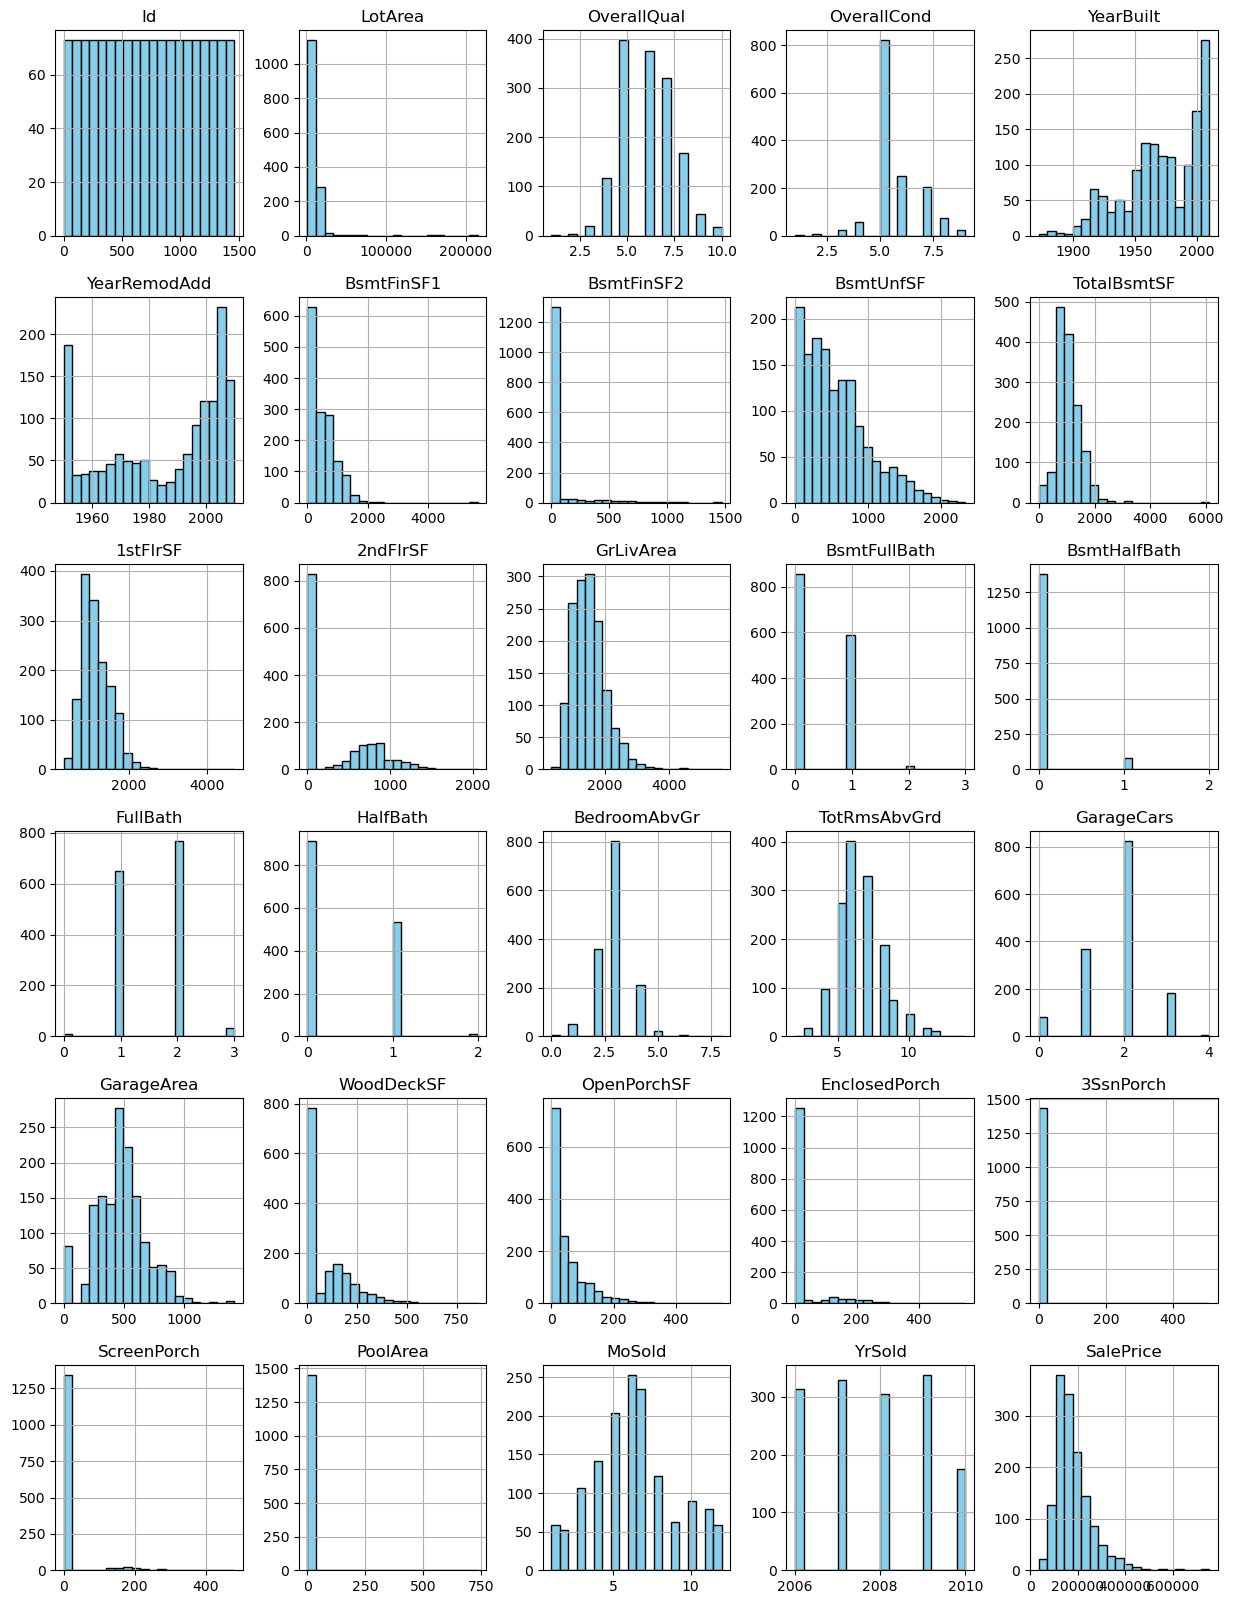

In [16]:
# Yalnızca sayılarla ifade edilen verileri içeren sütunların histogram grafiğini getirdik
df.select_dtypes(include='number').hist(figsize=(15,20), bins=20, color='skyblue', edgecolor='black')

plt.show() 

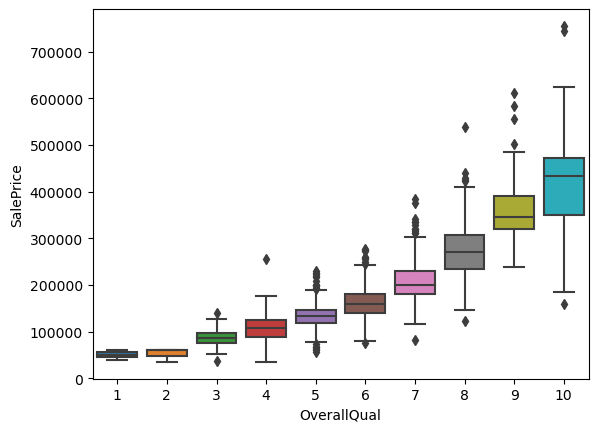

In [17]:
#Seaborn kütüphanesini kullanarak bir kutu grafiği oluşturduk
sns.boxplot(x='OverallQual', y='SalePrice', data=df)

plt.show() 

In [18]:
#Korelasyon matrisi oluşturuldu.
corr_matrix = df.corr()
corr_matrix

,Id,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SalePrice
Id,1.000000,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.005024,-0.005968,-0.007940,-0.015415,...,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,0.021172,0.000712,-0.021917
LotArea,-0.033226,1.000000,0.105806,-0.005636,0.014228,0.013788,0.214103,0.111170,-0.002618,0.260833,...,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.105806,1.000000,-0.091932,0.572323,0.550684,0.239666,-0.059119,0.308159,0.537808,...,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.046231,0.040229,-0.136841,-0.171098,...,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.014228,0.572323,-0.375983,1.000000,0.592855,0.249503,-0.049107,0.149040,0.391452,...,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.013788,0.550684,0.073741,0.592855,1.000000,0.128451,-0.067759,0.181133,0.291066,...,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,0.021490,0.035743,0.507101
BsmtFinSF1,-0.005024,0.214103,0.239666,-0.046231,0.249503,0.128451,1.000000,-0.050117,-0.495251,0.522396,...,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.005968,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.050117,1.000000,-0.209294,0.104810,...,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,-0.015211,0.031706,-0.011378
BsmtUnfSF,-0.007940,-0.002618,0.308159,-0.136841,0.149040,0.181133,-0.495251,-0.209294,1.000000,0.415360,...,0.183303,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,0.034888,-0.041258,0.214479
TotalBsmtSF,-0.015415,0.260833,0.537808,-0.171098,0.391452,0.291066,0.522396,0.104810,0.415360,1.000000,...,0.486665,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,0.013196,-0.014969,0.613581


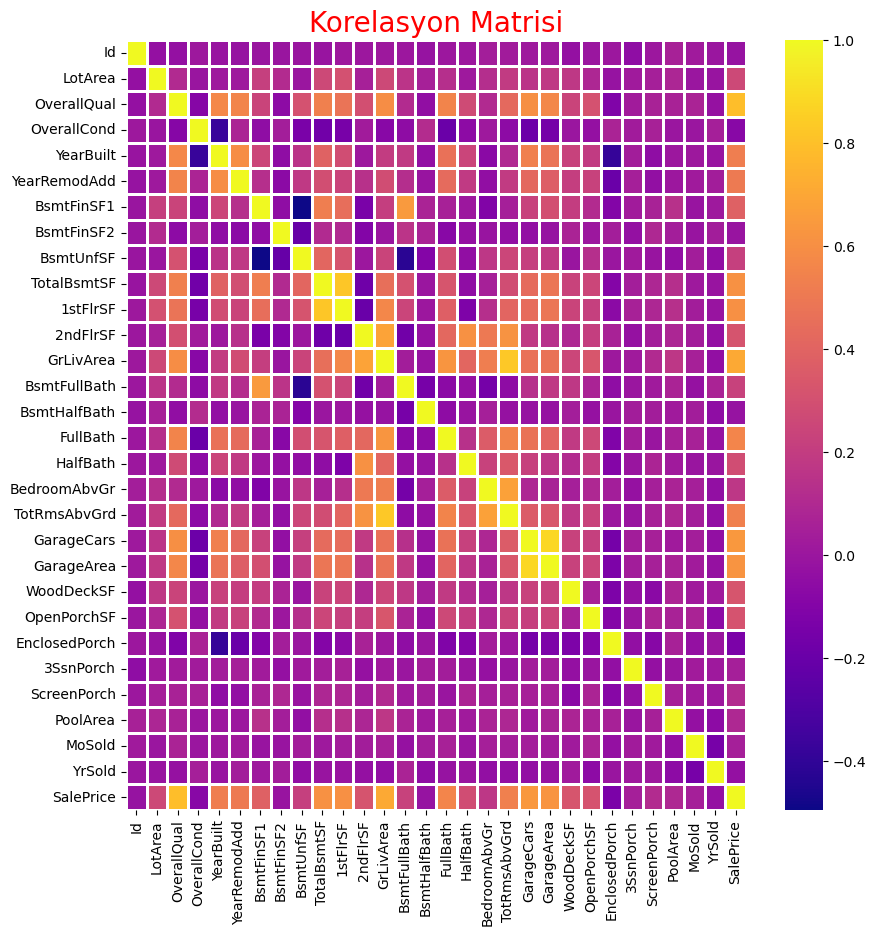

In [19]:
#Heatmap kullanarak korelasyon matrisi gösterilmiştir.
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, cmap='plasma', linewidths=0.75)

plt.title("Korelasyon Matrisi", color='red', fontsize= 20)

plt.show()

<Axes: xlabel='YearBuilt', ylabel='SalePrice'>

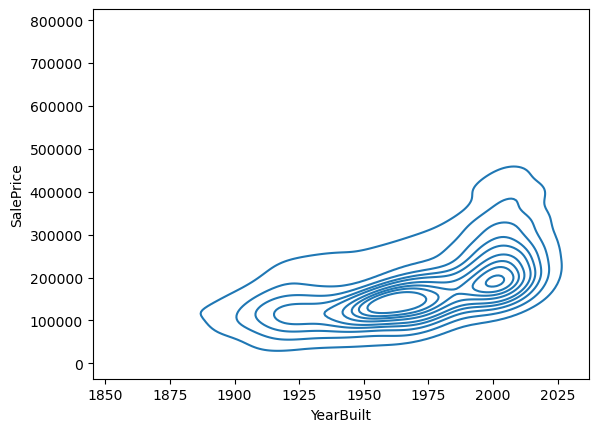

In [20]:
sns.kdeplot(data=df, x='YearBuilt', y='SalePrice')

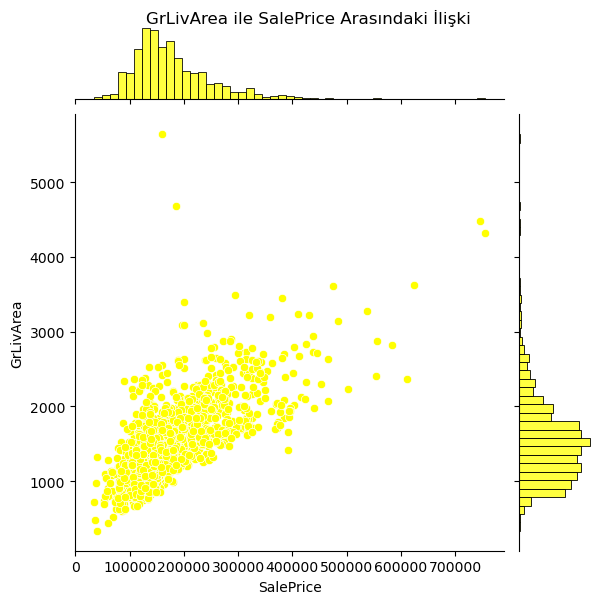

In [21]:
x = "SalePrice"
y = "GrLivArea"

# Joint plot oluşturuldu.
sns.jointplot(data=df, x=x, y=y, kind="scatter", color='yellow')

plt.suptitle('GrLivArea ile SalePrice Arasındaki İlişki', y=1)

plt.show()

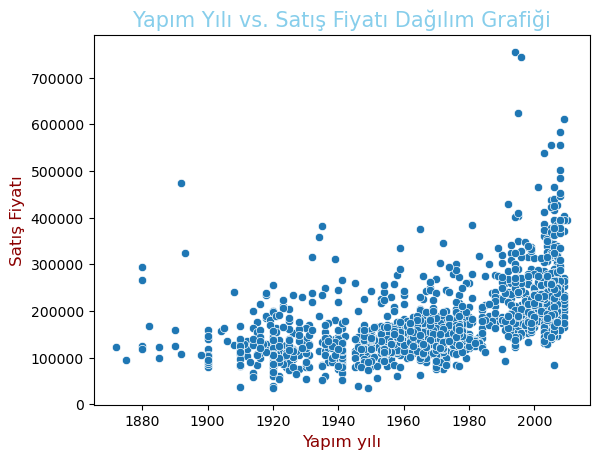

In [101]:
#Satış fiyatı ve yapım yılı ile ilgili dağılım grafiği,scatterplot ile elde edildi.
sns.scatterplot(x='YearBuilt', y='SalePrice', data=df)

plt.xlabel('Yapım yılı', color='darkred', fontsize = 12)
plt.ylabel('Satış Fiyatı', color= 'darkred', fontsize = 12)
plt.title('Yapım Yılı vs. Satış Fiyatı Dağılım Grafiği', color='SkyBlue', fontsize = 15)

plt.show()

In [23]:
# 'OverallQual' sütunundaki verileri replace ile sayılara isim vererek 'OverallQual_new' adında yeni bir değişiklik yaptık
OverallQual_new = {
    
    1: "Very Poor",
    2: "Poor",
    3: "Fair",
    4: "Below Average",
    5: "Average",
    6: "Above Average",
    7: "Good",
    8: "Very Good",
    9: "Excellent",
    10: "Very Excellent"
}

# OverallQual sütunundaki değerleri yukarıdaki eşleştirmeye göre değiştirdik
df['OverallQual'].replace(OverallQual_new, inplace = True)


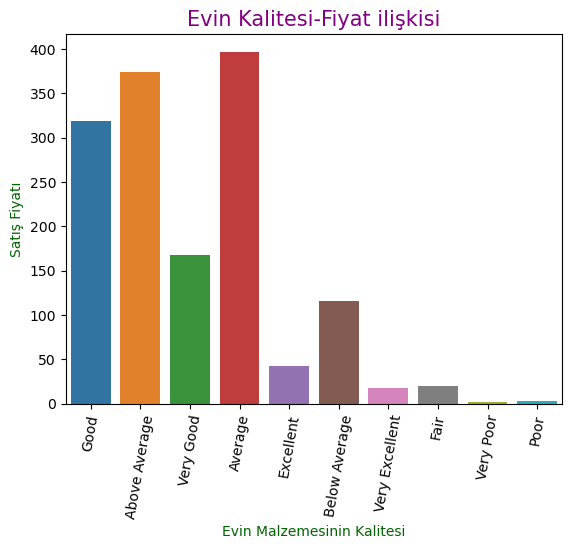

In [24]:
#Verilmiş yeni isimler ile countplot grafiği kullanıldı
sns.countplot(x='OverallQual', data=df)

plt.xlabel('Evin Malzemesinin Kalitesi', color = 'darkgreen')
plt.ylabel('Satış Fiyatı', color = 'darkgreen')
plt.title('Evin Kalitesi-Fiyat ilişkisi', color = 'purple', fontsize = 15)
plt.xticks(rotation=80) 

plt.show()

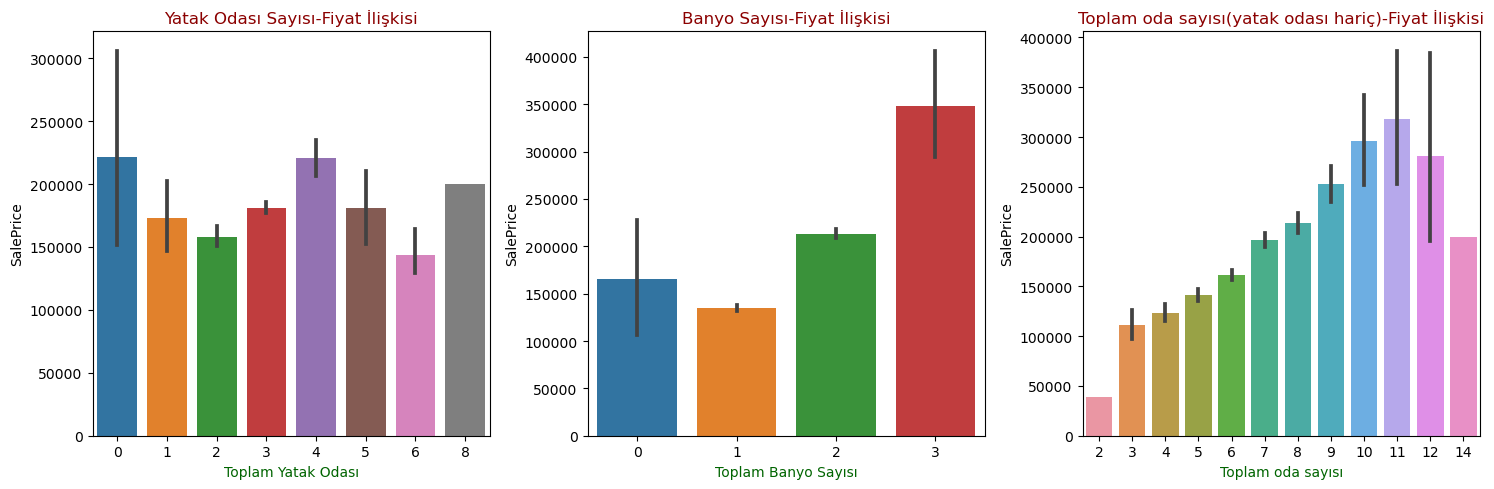

In [25]:
#Evin fiyatını etkileyen oda sayısı hakkında, boxplot kullanarak, yan yana 3 grafik gösterildi.
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.barplot(x='BedroomAbvGr', y='SalePrice', data=df, ax=axes[0])
axes[0].set_title('Yatak Odası Sayısı-Fiyat İlişkisi' ,  color = 'darkred')
axes[0].set_xlabel('Toplam Yatak Odası', color = 'darkgreen')

sns.barplot(x='FullBath', y='SalePrice', data=df, ax=axes[1])
axes[1].set_title('Banyo Sayısı-Fiyat İlişkisi', color = 'darkred')
axes[1].set_xlabel('Toplam Banyo Sayısı', color = 'darkgreen')

sns.barplot(x='TotRmsAbvGrd', y='SalePrice', data=df, ax=axes[2])
axes[2].set_title('Toplam oda sayısı(yatak odası hariç)-Fiyat İlişkisi',color = 'darkred')
axes[2].set_xlabel('Toplam oda sayısı', color = 'darkgreen')

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

plt.show()


In [58]:
#Korelasyonun farklı renklerle gösterilmesi için bir yöntem
renkcols= ['GarageArea', 'LotArea', 'GrLivArea', 'TotalBsmtSF']
corr = df[cols].corr() 
corr.style.background_gradient(cmap='viridis', axis=0) 

,GarageArea,LotArea,GrLivArea,TotalBsmtSF
GarageArea,1.000000,0.180403,0.468997,0.486665
LotArea,0.180403,1.000000,0.263116,0.260833
GrLivArea,0.468997,0.263116,1.000000,0.454868
TotalBsmtSF,0.486665,0.260833,0.454868,1.000000


In [57]:
# 'Excellent' kategorisindeki veriler
excellent_data = df[df['OverallQual'] == 'Excellent']

# 'Good' kategorisindeki veriler
good_data = df[df['OverallQual'] == 'Good']

# 'Above Average' kategorisindeki veriler
above_average_data = df[df['OverallQual'] == 'Above Average']

# 'Average' kategorisindeki veriler
average_data = df[df['OverallQual'] == 'Average']

# 'Below Average' kategorisindeki veriler
below_average_data = df[df['OverallQual'] == 'Below Average']

# Grupların toplam satış fiyatlarını hesapladık
excellent_total_price = excellent_data['SalePrice'].sum()
good_total_price = good_data['SalePrice'].sum()
above_average_total_price = above_average_data['SalePrice'].sum()
averge_total_price = average_data['SalePrice'].sum()
below_average_total_price =below_average_data['SalePrice'].sum()

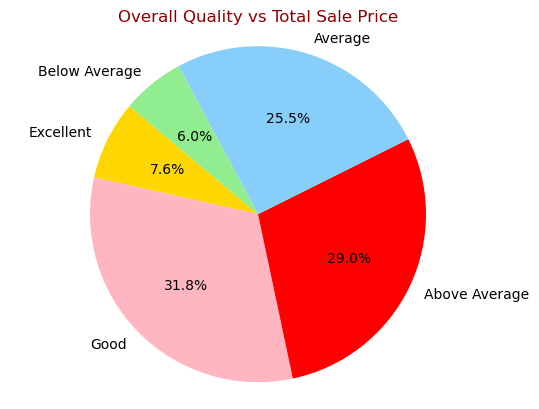

In [44]:
# Pasta grafiği verileri
labels = ['Excellent', 'Good', 'Above Average','Average','Below Average',]
sizes = [excellent_total_price, good_total_price, above_average_total_price, averge_total_price, below_average_total_price]
colors = ['gold', 'lightpink', 'red', 'lightskyblue', 'lightgreen']

# Pasta grafiği oluşturma kısmı
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Pasta grafiğini gösterme aşaması
plt.axis('equal')  # Daire şeklinde görüntülemek için
plt.title('Overall Quality vs Total Sale Price', color = 'darkred')

plt.show()

In [72]:
poolqc_mapping = {
    'Ex': 'Excellent',
    'Gd': 'Good',
    'TA': 'Average/Typical',
    'Fa': 'Fair',
    'NA': 'No Pool'  # 'NA' yerine 'No Pool' olarak değiştirmiştik en başta eksik veriler kısmında
}

# PoolQC sütunundaki değerleri yukarıdaki eşleştirmeye göre değiştirdik
df['PoolQC'] = df['PoolQC'].replace(poolqc_mapping)

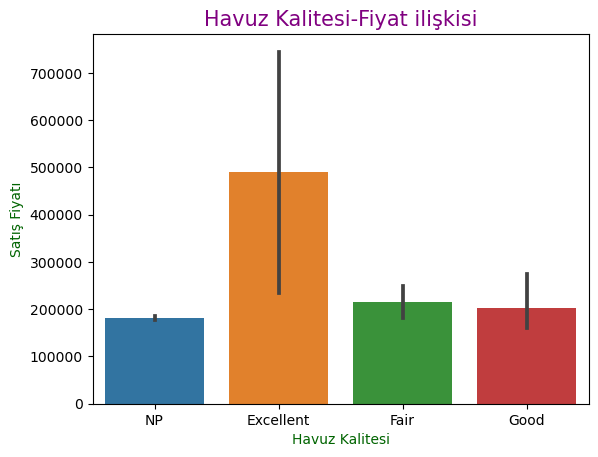

In [81]:
#Havuz kalitesinin fiyata yansımasını ele alarak bar grafiği oluşturuldu.
sns.barplot(x='PoolQC',y='SalePrice', data=df)

plt.xlabel('Havuz Kalitesi', color = 'darkgreen')
plt.ylabel('Satış Fiyatı', color = 'darkgreen')
plt.title('Havuz Kalitesi-Fiyat ilişkisi', color = 'purple', fontsize = 15)

plt.show()

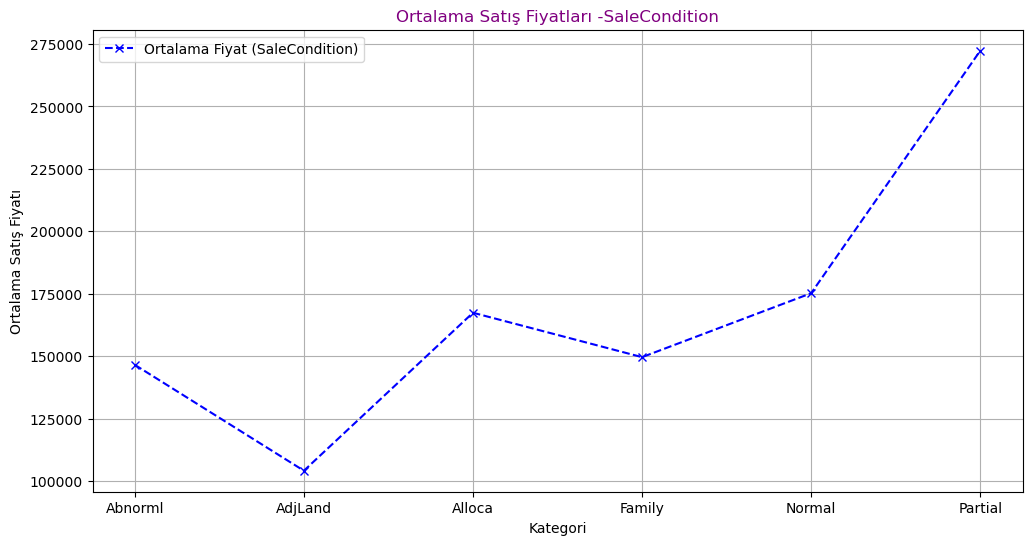

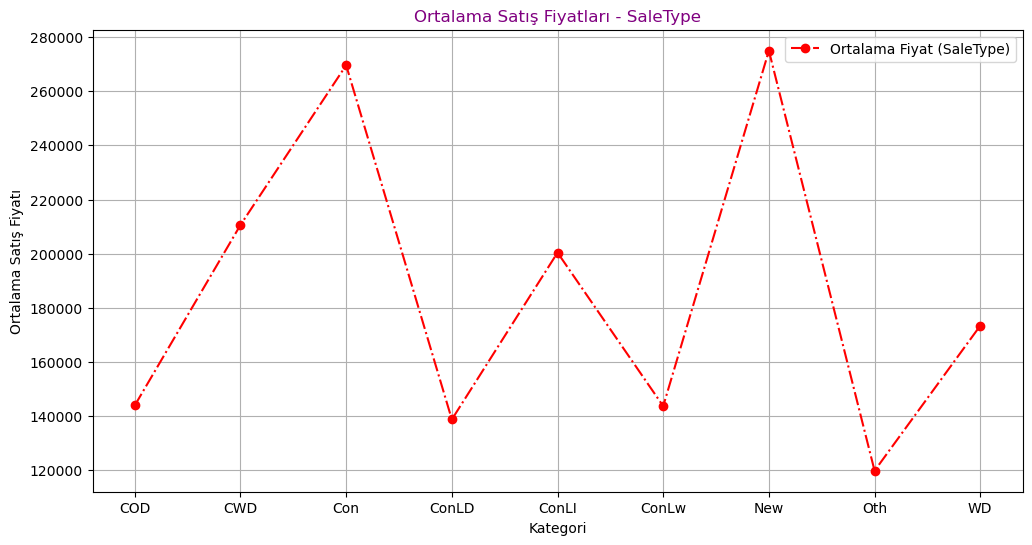

In [100]:
# "SaleType" veya "SaleCondition" kategorilerine göre ortalama satış fiyatları hesaplanması
avg_prices_by_condition = df.groupby('SaleCondition')['SalePrice'].mean()

plt.figure(figsize=(12, 6))

# Çizgi rengi ve şekli özelleştirildi
plt.plot(avg_prices_by_condition.index, avg_prices_by_condition.values, marker='x', label='Ortalama Fiyat (SaleCondition)', linestyle='--', color='blue')

# Etiketler ve grafiği düzenleme
plt.xlabel('Kategori')
plt.ylabel('Ortalama Satış Fiyatı')
plt.title('Ortalama Satış Fiyatları -SaleCondition', color='purple')

plt.legend()
plt.grid(True)
plt.show()

#İkinci grafike de yukarıdaki bilgilere benzer şekilde girildi.
plt.figure(figsize=(12, 6))

plt.plot(avg_prices_by_type.index, avg_prices_by_type.values, marker='o', label='Ortalama Fiyat (SaleType)', linestyle='-.', color='red')

avg_prices_by_type = df.groupby('SaleType')['SalePrice'].mean()

plt.xlabel('Kategori')
plt.ylabel('Ortalama Satış Fiyatı')
plt.title('Ortalama Satış Fiyatları - SaleType', color='purple')

plt.legend()
plt.grid(True)
plt.show()